In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import asc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [6]:
#Measurement
mcolumns = inspector.get_columns('measurement')
for column in mcolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
#Station
scolumns = inspector.get_columns('station')
for column in scolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
#Measurement
engine.execute("select * from measurement order by date asc").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2725, 'USC00513117', '2010-01-01', 0.28, 67.0),
 (9008, 'USC00518838', '2010-01-01', 0.21, 72.0),
 (9519, 'USC00519523', '2010-01-01', 0.15, 75.0),
 (12188, 'USC00519281', '2010-01-01', 0.15, 70.0),
 (14960, 'USC00511918', '2010-01-01', 0.05, 66.0),
 (16939, 'USC00516128', '2010-01-01', 0.14, 73.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (2726, 'USC00513117', '2010-01-02', 0.0, 65.0),
 (9009, 'USC00518838', '2010-01-02', 0.02, 73.0),
 (9520, 'USC00519523', '2010-01-02', 0.0, 75.0),
 (12189, 'USC00519281', '2010-01-02', 0.0, 62.0),
 (14961, 'USC00511918', '2010-01-02', 0.0, 70.0),
 (16940, 'USC00516128', '2010-01-02', 0.0, 61.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (2727, 'USC00513117', '2010-01-03', 0.0, 75.0),
 (9010, 'USC00518838', '2010-01-03', 0.0, 67.0),
 (9521, 'USC00519523', '2010-01-03', 0.0, 77.0),
 (12190, 'USC00519281', '2010-01-03', 0.0, 74.0),
 (14962, 'USC00511918', '2010-01-03', 0.0, 75.0),
 (16941, 'USC

In [9]:
#Station
engine.execute("select * from station limit (10)").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
most_recent_date

('2010-01-01')

Date one year before:  2016-08-23


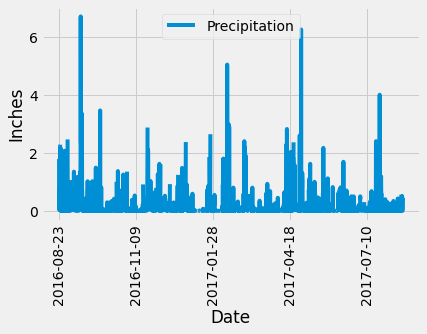

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_before_most_recent = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Date one year before: ", year_before_most_recent)

# Perform a query to retrieve the data and precipitation scores
data_and_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_before_most_recent).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_and_prcp_df = pd.DataFrame(data_and_prcp, columns=['Date', 'Precipitation']).set_index('Date')
data_and_prcp_df.head()

# Sort the dataframe by date
data_and_prcp_df_sorted = data_and_prcp_df.sort_index(ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
data_and_prcp_df_sorted.plot()
plt.tight_layout()
plt.ylabel('Inches')
plt.xticks(rotation = 90)
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_and_prcp_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for x in station_counts:
    print(x)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
calculations = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
calculations

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

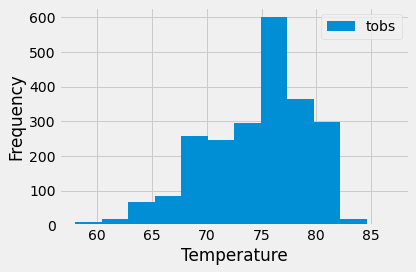

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
y = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).all()

year_before_most_active_stationid = dt.date(2017,8,18) - dt.timedelta(days=365)

data_and_prcp2 = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_before_most_active_stationid).all()

data_and_prcp2_df = pd.DataFrame(data_and_prcp2)

data_and_prcp2_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close session

In [30]:
# Close Session
session.close()